# Q1

### import packages 

In [1]:
from PIL import Image
import numpy
from numpy import array
import numpy as np
from tkinter import _flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn import svm

### reading ORL dataset

In [2]:
image_matrix = np.zeros((400, 2576))
gender = np.array([])
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        image_matrix[i+j*10] = image_array.flatten()
gender = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
gender = list(_flatten(gender))

### split and normalize the training, testing dataset

In [3]:
X = image_matrix
y = gender

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalize
sc=StandardScaler()
sc.fit(X_train)
X_train_nor=sc.transform(X_train)
X_test_nor=sc.transform(X_test)

### Logistic Regression

In [4]:
# Create LogisticRegression Model
lr=LogisticRegression()
lr.fit(X_train_nor,y_train)
print("Accuracy of LR model: ",100*lr.score(X_test_nor, y_test),"%")

Accuracy of LR model:  96.25 %


C:\Users\TerryYang\anaconda3\envs\TENSORFLOW\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbor

In [5]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_nor,y_train)
print("Accuracy of KNN model: ",100*knn.score(X_test_nor, y_test),"%")

Accuracy of KNN model:  97.5 %


### Support Vector Machine

In [6]:
# Create LogisticRegression Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_train,y_train)
print("Accuracy of SVM model: ",100*clf.score(X_test_nor, y_test),"%")

Accuracy of SVM model:  88.75 %


### Discussion:
### KNN model (K=5) has better accuracy than LR, SVM model.
### (The result might be different under different model settings.)

# Q2

### import packages

In [7]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import math

### using LASSO reduce the size of data

In [8]:
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)

Lasso(alpha=0.001, normalize=True)

### finding & plotting down the important pixels

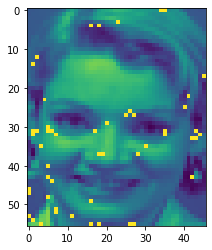

In [9]:
important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)
image = Image.open(r"C:\Users\TerryYang\pythonwork\pythonwork\Data Analytics Homework\ORL Faces\1_1.png")
img_array = np.array(image)
#print(len(important_pixels),"important pixels at")
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col
    #print("(",col,",", row,")")    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

### selecting important pixels 

In [10]:
X_important = np.zeros((400, len(important_pixels)))
X_important = X.T[important_pixels]
X_important = X_important.T

### split and normalize the training, testing dataset

In [11]:
# Split data
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=1)

# Normalize
sc=StandardScaler()
sc.fit(X_important_train)
X_important_train_nor=sc.transform(X_important_train)
X_important_test_nor=sc.transform(X_important_test)

### Logistic Regression

In [16]:
lr=LogisticRegression()
lr.fit(X_important_train_nor,y_train)
print("Accuracy of LR model after using LASSO reduction: ",100*lr.score(X_important_test_nor, y_test),"%")

Accuracy of LR model after using LASSO reduction:  97.5 %


### K-Nearest Neighbor

In [17]:
# Create KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_important_train_nor,y_train)
print("Accuracy of KNN model after using LASSO reduction: ",100*knn.score(X_important_test_nor, y_test),"%")

Accuracy of KNN model after using LASSO reduction:  97.5 %


### Support Vector Machine

In [18]:
# Create LogisticRegression Model
clf=svm.SVC(kernel='linear',C=1)
clf.fit(X_important_train_nor,y_train)
print("Accuracy of SVM model after using LASSO reduction: ",100*clf.score(X_important_test_nor, y_test),"%")

Accuracy of SVM model after using LASSO reduction:  96.25 %


### Discussion:
### Accuracy of LR, SVM model increased while using LASSO selecting the important pixels first.
### (The result might be different under different model settings)